In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
sales.shape

(1000, 17)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

By inspection, the 'Date' datatype is an object, we need to change it to datetime



In [34]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [35]:
sales['day'] = (sales['Date']).dt.day
sales['month'] = (sales['Date']).dt.month
sales['year'] = (sales['Date']).dt.year

In [36]:
sales['Time'] = pd.to_datetime(sales['Time'])

In [37]:
sales['Hour'] = sales['Time'].dt.hour

Let's see the unique hours of sales in this dataset


In [38]:
sales['Hour'].nunique()  #gives us the number of unique hours 

11

In [39]:
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [43]:
sales.describe()   #description of numerical data

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


Let's find the categorical data

In [47]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype=="object"]

In [48]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [76]:
for i in categorical_columns:
    if i!= 'Invoice ID':
        print("unique values in the {} column".format(i), end=" ")
        print(len(sales[i].unique().tolist()))

unique values in the Branch column 3
unique values in the City column 3
unique values in the Customer type column 2
unique values in the Gender column 2
unique values in the Product line column 6
unique values in the Payment column 3


In [84]:
sales['Gender'].describe()

count       1000
unique         2
top       Female
freq         501
Name: Gender, dtype: object

Text(0.5, 1.0, 'Gender_Count')

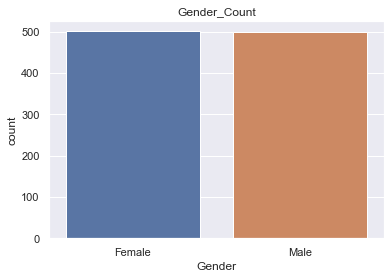

In [85]:
sns.set(style='darkgrid')
sns.countplot(x='Gender', data=sales).set_title('Gender_Count')

Text(0.5, 1.0, 'Ratings by Branch')

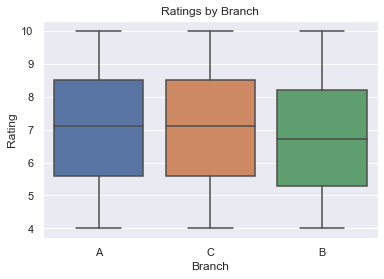

In [86]:
sns.boxplot(x="Branch", y="Rating", data=sales).set_title("Ratings by Branch")

Branch B has the lowest rating among all the branches

Text(0.5, 1.0, 'Product Sales per Hour')

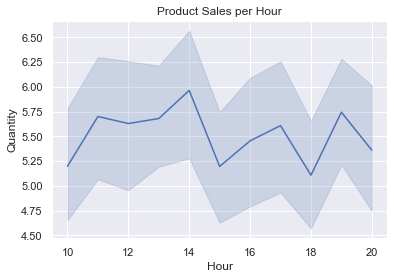

In [113]:
sns.lineplot(x = "Hour", y="Quantity", data=sales).set_title("Product Sales per Hour")

Sales by the hour in the comapny, most of quantity were sold around 14:00 hrs

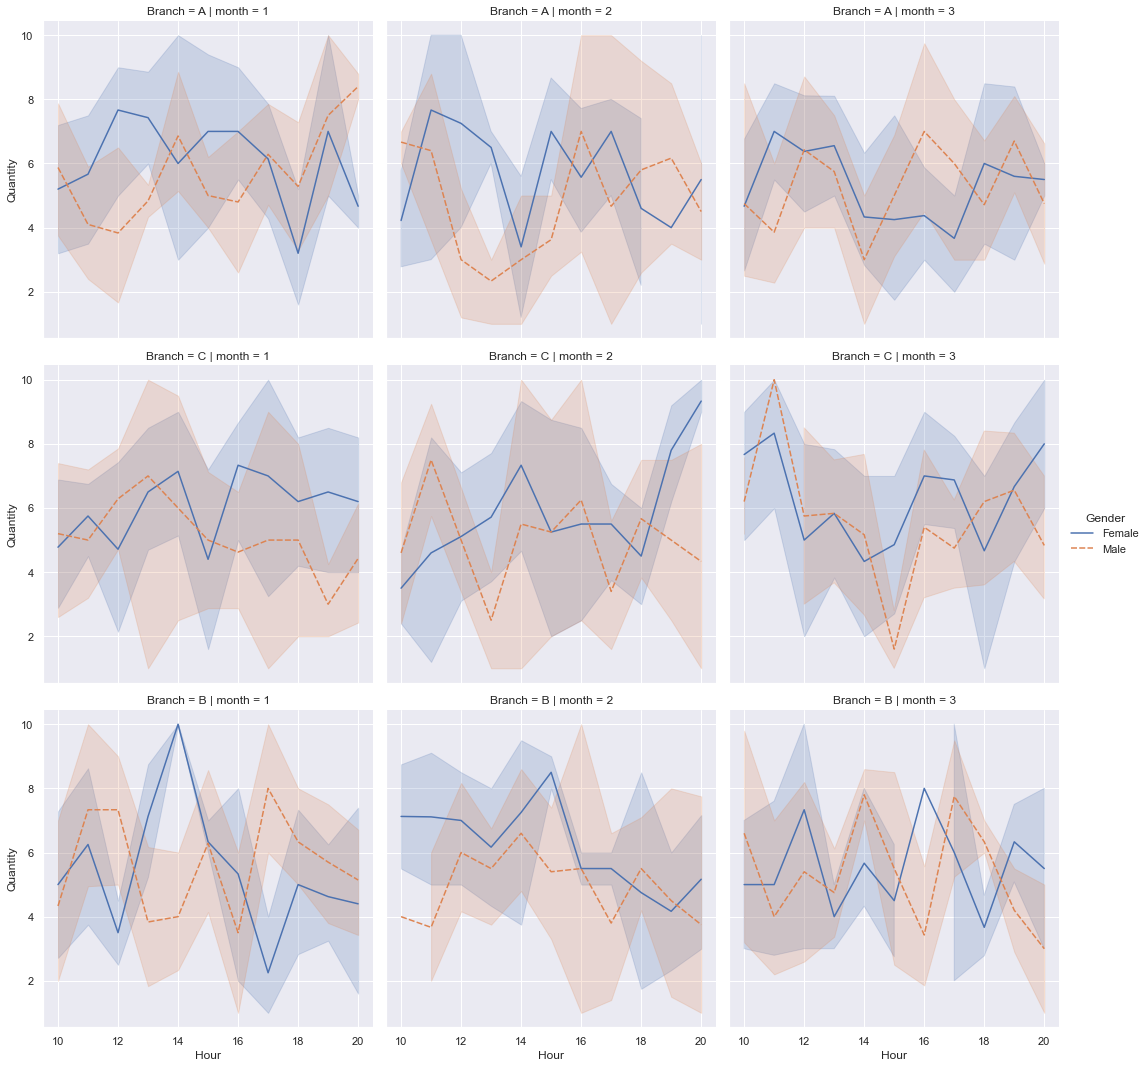

In [102]:
sns.relplot(x="Hour", y="Quantity", col="month", row="Branch", kind="line", hue="Gender", style="Gender", data=sales)

Below we can see each branch's sales by the hour in a monthly fashion

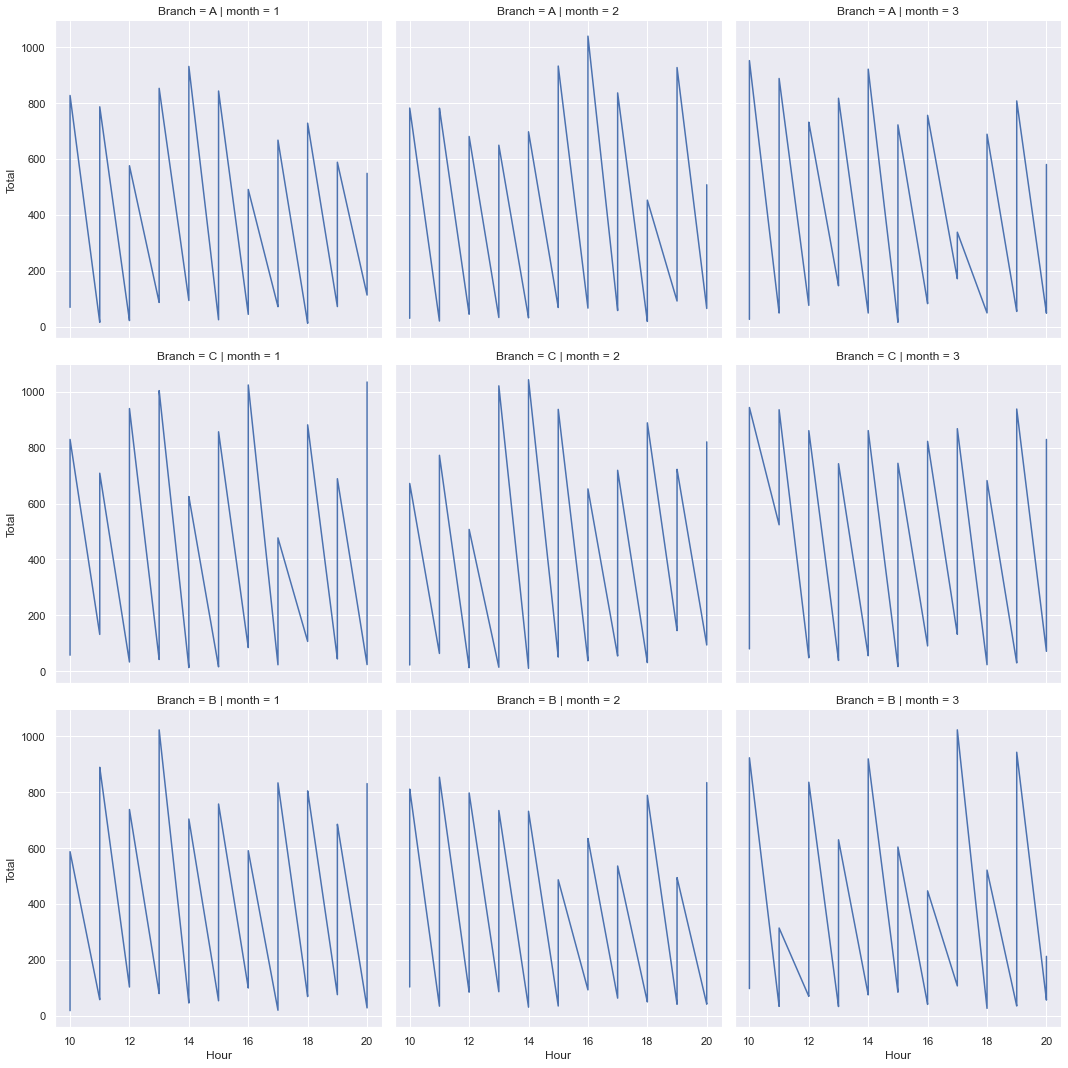

In [107]:
sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

In [110]:
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

<AxesSubplot:xlabel='Total', ylabel='Rating'>

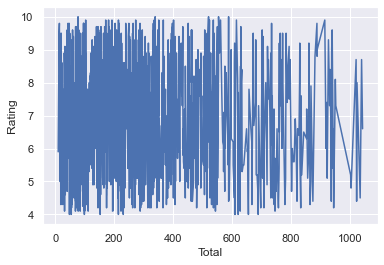

In [111]:
sns.lineplot(x="Total", y = "Rating", data =sales)

# Product Analysis

Let's look at the various products' performance.

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

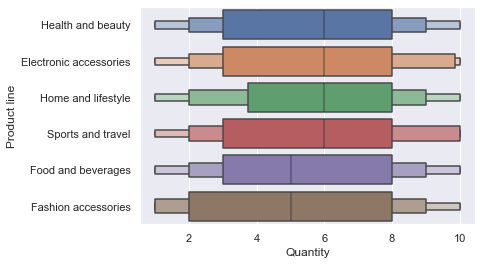

In [114]:
sns.boxenplot(x = "Quantity", y="Product line", data=sales)

From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories.

<AxesSubplot:xlabel='count', ylabel='Product line'>

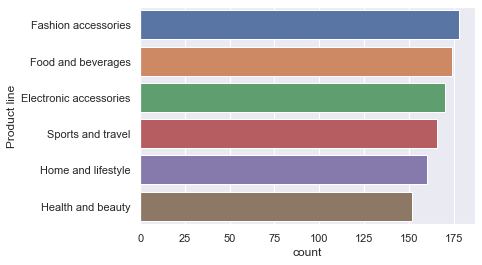

In [125]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest

<AxesSubplot:xlabel='Total', ylabel='Product line'>

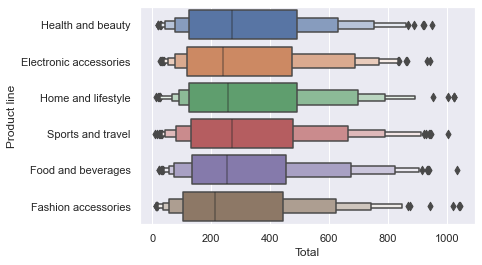

In [141]:
sns.boxenplot(y = 'Product line', x = 'Total', data=sales )

<AxesSubplot:xlabel='Total', ylabel='Product line'>

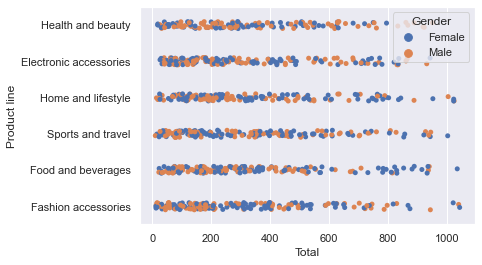

In [139]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

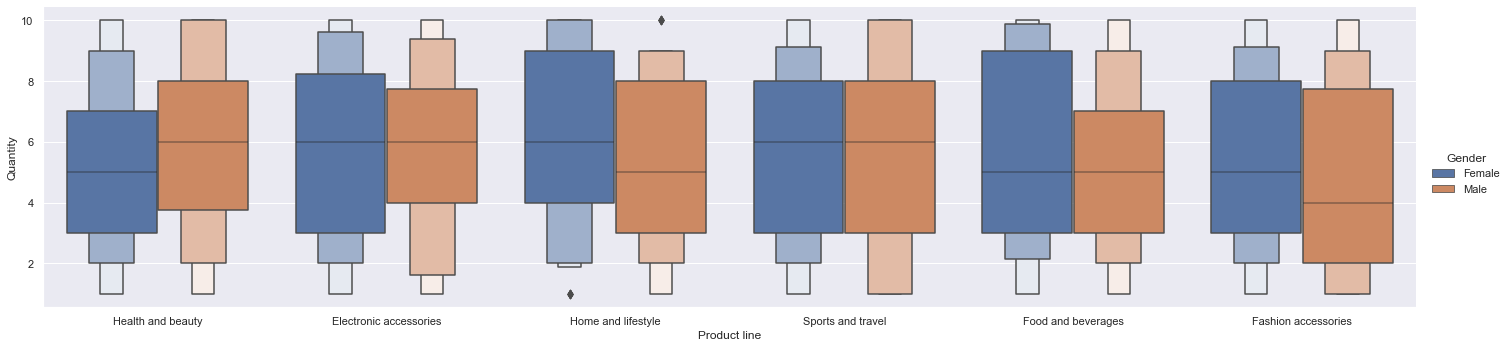

In [192]:
sns.catplot(x = 'Product line', y = 'Quantity', hue = 'Gender', kind= 'boxen', data = sales, aspect = 4);

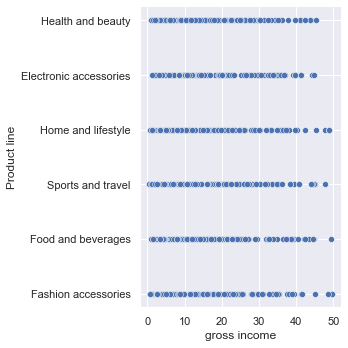

In [142]:
sns.relplot(y = 'Product line', x = 'gross income', data=sales )

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

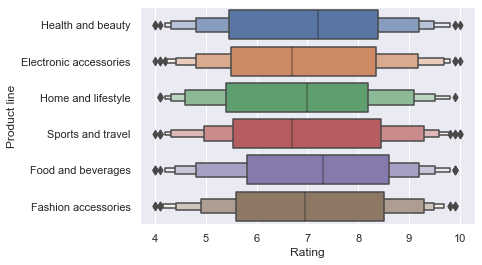

In [147]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

*Highest Product line sold: Fashion accessories

*Lowest Product line sold: Health and beauty

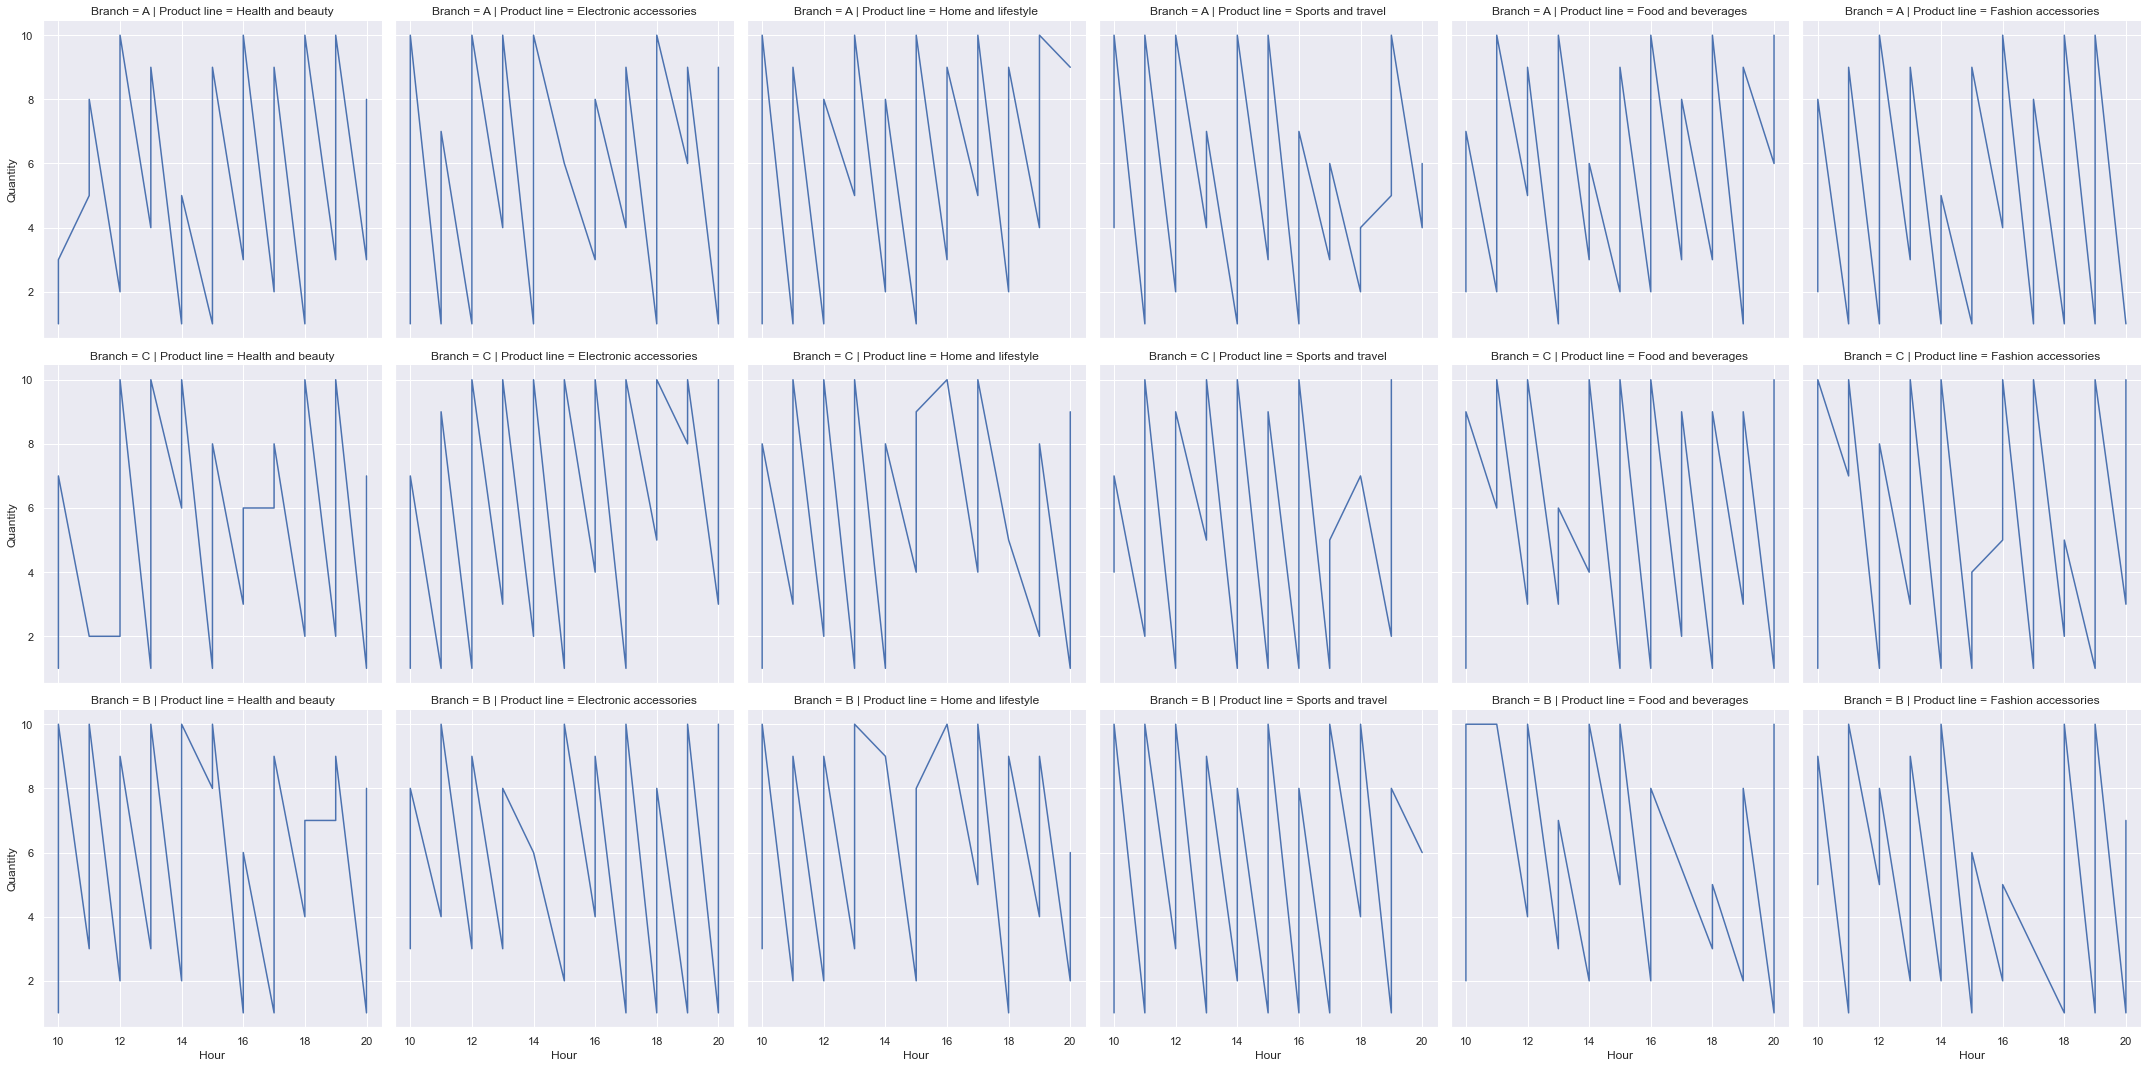

In [152]:
sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00

# Payment Channel

let's see how custumers pay their products

Text(0.5, 1.0, 'Payment Channel')

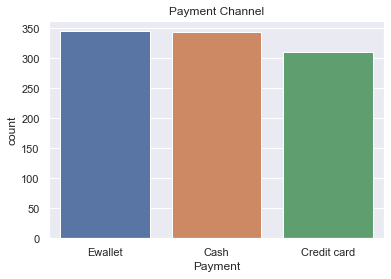

In [153]:
sns.countplot(x="Payment", data=sales).set_title("Payment Channel") 

Most of the custumers pay through the Ewallet and Cash Payment while 30% of them pay with their Credit card.

let's see now this payment type how distributed across all the branches

Text(0.5, 1.0, 'Payment Channel by Branch')

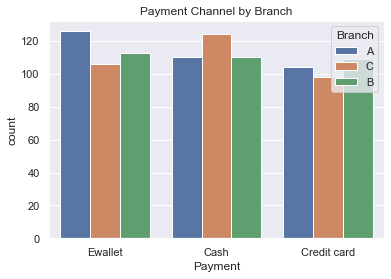

In [163]:
sns.countplot(x="Payment", hue="Branch", data=sales).set_title("Payment Channel by Branch") 

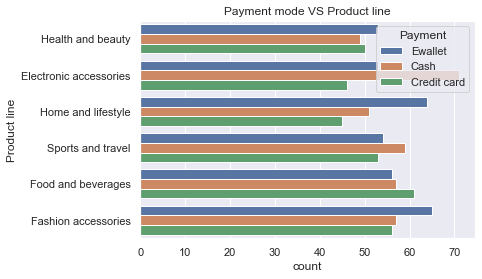

In [191]:
sns.countplot(y = 'Product line', data = sales, hue = 'Payment').set_title('Payment mode VS Product line');

# Customer Analysis

From inspection, there are two types of customers. Members and Normal. Let's see how many they are and where they are

In [164]:
sales["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Text(0.5, 1.0, 'Customer type by branch')

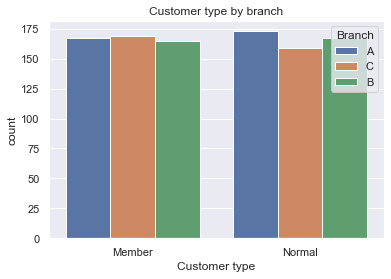

In [167]:
sns.countplot(x="Customer type", hue="Branch", data=sales).set_title("Customer type by branch") 

# Does customer type influences the sales

In [179]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<AxesSubplot:xlabel='Customer type', ylabel='Total'>

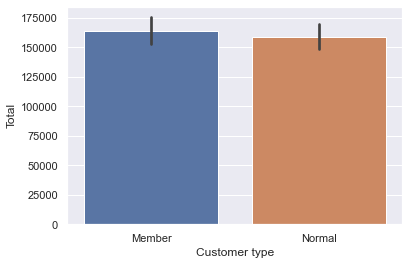

In [177]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

In [186]:
sales.groupby(["City"]).agg({'Total': 'sum'})

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


<AxesSubplot:xlabel='City', ylabel='Total'>

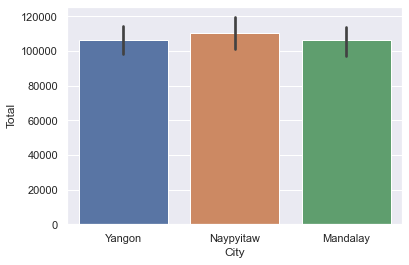

In [187]:
sns.barplot(x="City", y="Total", estimator = sum, data=sales)

With the use of google search, I was able to get the longitude and latitude of each cities. We can

In [188]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in sales:
    sales['long'] = sales['City'].map(long)
    sales['lat'] = sales['City'].map(lat)

Text(0.5, 1.0, 'Customer Type')

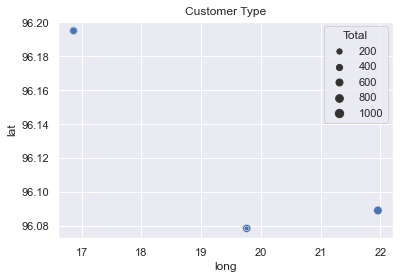

In [189]:
sns.scatterplot(x="long",  y = "lat",size = "Total", data =sales, legend = "brief").set_title("Customer Type") 

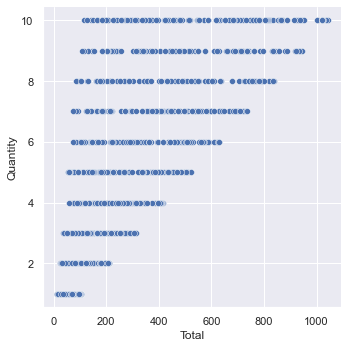

In [190]:
 sns.relplot(x="Total",  y = "Quantity", data =sales)

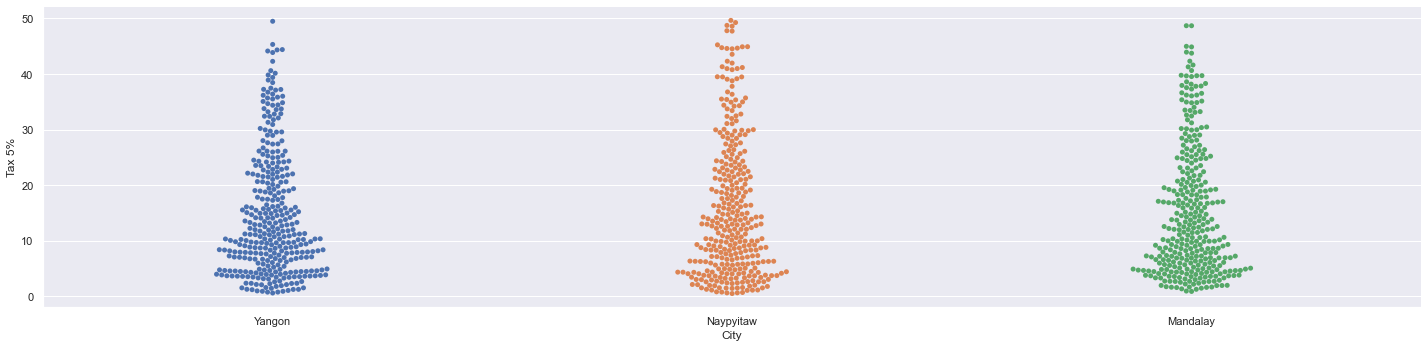

In [193]:
sns.catplot(y = 'Tax 5%', x = 'City', kind= 'swarm', data = sales, aspect =4);

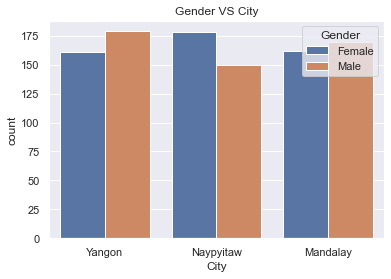

In [194]:
sns.countplot(x = 'City', hue = 'Gender', data = sales).set_title("Gender VS City");

Yangon has the highest male customers with Naypyitaw having mostly female